In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import time
import utils
from utils import *
import os
import importlib
import argparse
import trader  
import matplotlib.pyplot as plt
from trendline_automation import *
from wedge import *
binance = get_binance()

In [86]:
tf = "15m"
sym = "BTC/USDT"
limit = 1500
time_df = await past_data(binance, sym, tf, limit)

In [87]:
df = time_df.copy()
df.index = df.apply(lambda x: int(x.name.timestamp()), axis=1)
df.reset_index(drop=False, inplace=True)

df["Pivot"] = 0

# Get the minimas and maximas 
df["Pivot"]    = df.apply(lambda x: pivot_id(df, x.name, 10, 10), axis=1)
df['PointPos'] = df.apply(lambda x: pivot_point_position(x), axis=1) # Used for visualising the pivot points

-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500


In [152]:
t_block = 1500
imgname = 0
# time_df["PointPos"] = df["PointPos"]
for t in range(0, limit, 50):
    t_df = df[t: t+t_block]
    t_df.reset_index(drop=True, inplace=True)
    # save_trendline_img(t_df, imgname)
    save_wedgeline_img(t_df, imgname)
    imgname += 1
    
    break
    

[2, 1, 2, 1]
[[19, 256], [182, 804], [753, 1159], [1088, 1475]]
1500


/home/nhkim/object-detection-data-augmentation/cc/trendline_automation.py:329: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candles["Index"] = candles.index


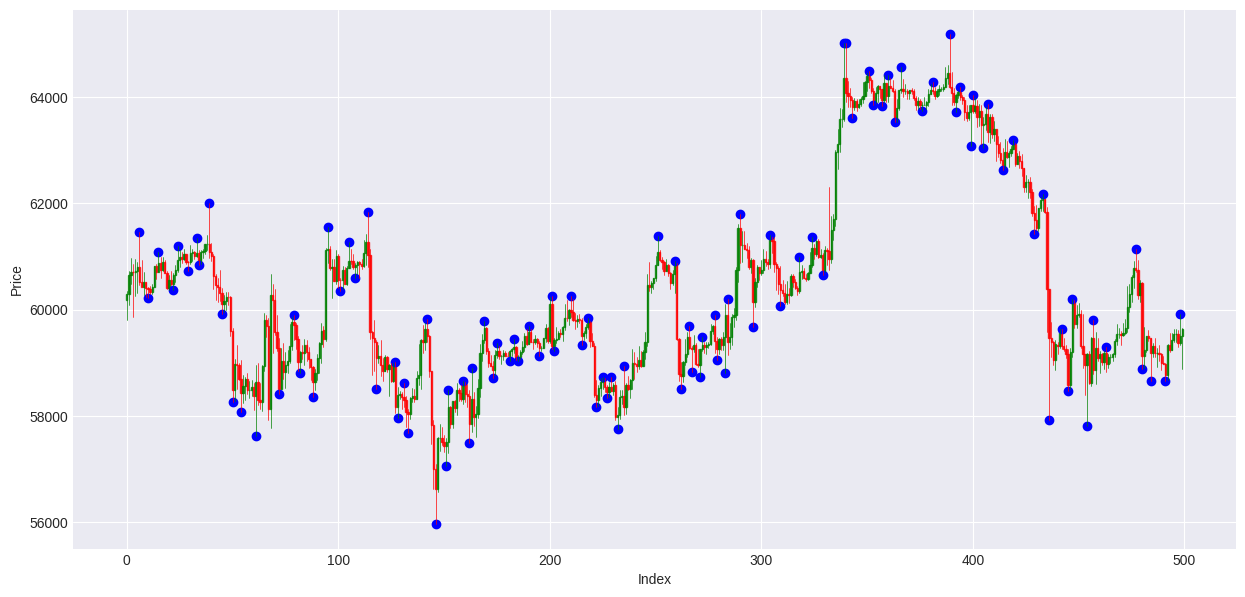

In [5]:


# Plot sample point positions
point_position_plot(df, 0, 500)

# Find all wedge pattern points
# back_candles = 200
# all_points   = find_wedge_points(df, back_candles)

# # Plot the wedge pattern graphs
# save_plot(df, all_points, back_candles)


In [105]:
a = [1,2,1,2,3]
a.pop(2)
a

[1, 2, 2, 3]